# 33 - Evaluacion de Modelos para la  Clasificacion - Hold-Out


* En este Notebook vamos a resolver un problema de ***Clasificación Binaria con las Regresión Logística usando la librería de Scikit-Learn y evaluaremos el modelo generado*** con las diferentes métricas de evaluación vistas tanto con los ***datos de entrenamiento*** como con los ***datos de test***, particionados estos con la técnica de particionado Hold-Out.


* Para resolver este problema vamos a realizar los siguientes pasos:
<span></span><br>
    1. Carga de datos
<span></span><br>
    2. Cambio de estructura de datos a numpy y transformación de las etiquetas a números
<span></span><br>
    3. Visualización de los datos
<span></span><br>
    4. Particionado de datos en Entrenamiento y Test
<span></span><br>
    5. Creacción del modelo (hipótesis) y ajuste
<span></span><br>
    6. Evaluación del modelo con los datos de Entrenamiento y Test
<span></span><br>
    7. Visualización de los resultados


* En primer lugar vamos a importar las librería necesarias:

<hr>



In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline 

<hr>


## 1. Carga de datos


* El primer paso que vamos a realizar es el de cargar los datos que los tenemos en el siguiente fichero:
    - ***DataSet***: "./data/iris/iris.csv"


* Para ello ***leeremos el csv con pandas*** (pasandolo a un dataframe), teniendo las siguientes columnas que nos interesan para el problema a resolver
    - ***class***: Clase de la flor (Iris-versicolor, Iris-setosa)
    - ***sepal_length***: El "largo" del Sepalo
    - ***sepal_width***: El "ancho" del Sepalo

In [2]:
df = pd.read_csv("./data/iris/iris.csv")
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,class
22,4.6,3.6,1.0,0.2,Iris-setosa
103,6.3,2.9,5.6,1.8,Iris-virginica
3,4.6,3.1,1.5,0.2,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa
30,4.8,3.1,1.6,0.2,Iris-setosa


<hr>


## 2. Cambio de estructura de datos a numpy y transformación de las etiquetas a números


* Vamos a pasar los datos las flores a una nueva estructura de datos para que scikit-learn puedan trabajar con los datos:
<span></span><br><br>
    - Las ***columnas sepal_length y sepal_width*** representan las variables de entrada y las vamos a pasar a un array de array (***numpy array***)
<span></span><br><br>
    - La ***columna class*** que representa la clase (o variable de salida) y la vamos a pasar a un ***numpy array***
    
    
* Por otro lado tenemos que transformar la clase de la flor a números, por lo que utilizaremos la clase ***LabelEncoder()*** para transformar las etiquetas de las clases a números:

    - ***0***: ***Iris-Setosa***
    - ***1***: ***Iris-Versicolor***
    - ***2***: ***Iris-Virginica***

In [3]:
X = df[['sepal_length', 'sepal_width']].values   # Obtengo el alto y ancho del sepalo
y_labels = df['class'].values                    # Obtengo las etiquetas


le = preprocessing.LabelEncoder()     # Instancio un objeto de la clase LabelEncoder()
y = le.fit_transform(y_labels)        # Transformo las etiquetas a números

<hr>


## 3. Visualización de los datos


* A continuación vamos a ver la relación que hay entre las dos variables de los tres tipos de flores.


* Se puede observar como la clase Iris-Setosa se diferencia bien sobre las otras dos clases, pero es complicado diferenciar las clases Iris-Versicolor e Iris-Virginica entre ellas.

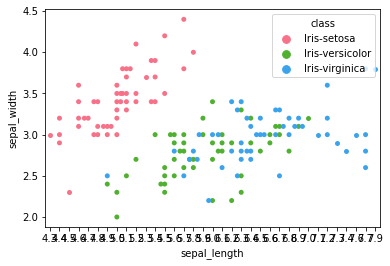

In [4]:
sns.swarmplot(x="sepal_length", y="sepal_width", hue="class", data = df, palette="husl")

<hr>


## 4. Particionado de datos en Entrenamiento y Test



In [5]:
np.random.seed(2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<hr>


## 5. Creacción del modelo (hipótesis) y ajuste


* A continuación pasamos a crear un objeto de la clase "***LogisticRegression()***" para la resolución del problema de clasificación.


* Una vez instanciado, procedemos a ajustar (entrenar) el modelo (o hipótesis) llamando al método ***fit(X,y)*** que recibe como parámetros el conjunto de datos de las variables de entrada 'X' y la variable de salida 'Y'.

In [6]:
# Creamos un objeto de la clase LogisticRegression pasandole una serie de parámetros
logreg = LogisticRegression(solver='liblinear', multi_class='ovr', max_iter=50)

# Entrenamos el modelo con los datos de entrenamiento
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=50, multi_class='ovr', solver='liblinear')

<hr>


## 6. Evaluación del modelo con los datos de Entrenamiento y Test


* Veamos a continuación los resultados de la evalución del modelo diferenciando los datos de entrenamiento y test:


### - Accuracy:

In [7]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test = logreg.score(X_test, y_test)

print("Accuracy_train = {acc:0.4f}".format(acc=accuracy_train))
print("Accuracy_test = {acc:0.4f}".format(acc=accuracy_test))

Accuracy_train = 0.7833
Accuracy_test = 0.7667


### - Precision, Recall, F1:

##### Entrenamiento

In [8]:
classification_train = classification_report(y_true=y_train, y_pred=logreg.predict(X_train), target_names =le.classes_)
print(classification_train)

                 precision    recall  f1-score   support

    Iris-setosa       0.97      1.00      0.99        36
Iris-versicolor       0.90      0.43      0.58        42
 Iris-virginica       0.63      0.95      0.76        42

       accuracy                           0.78       120
      macro avg       0.84      0.79      0.78       120
   weighted avg       0.83      0.78      0.77       120



##### Test

In [9]:
classification_test = classification_report(y_true=y_test, y_pred=logreg.predict(X_test), target_names =le.classes_)
print(classification_test)

                 precision    recall  f1-score   support

    Iris-setosa       0.93      0.93      0.93        14
Iris-versicolor       0.60      0.38      0.46         8
 Iris-virginica       0.64      0.88      0.74         8

       accuracy                           0.77        30
      macro avg       0.72      0.73      0.71        30
   weighted avg       0.76      0.77      0.75        30



### - Matriz de Confusión

* Con la siguiente función podemos pintar mejor la matriz de confusion:

In [10]:
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

##### Entrenamiento y Test

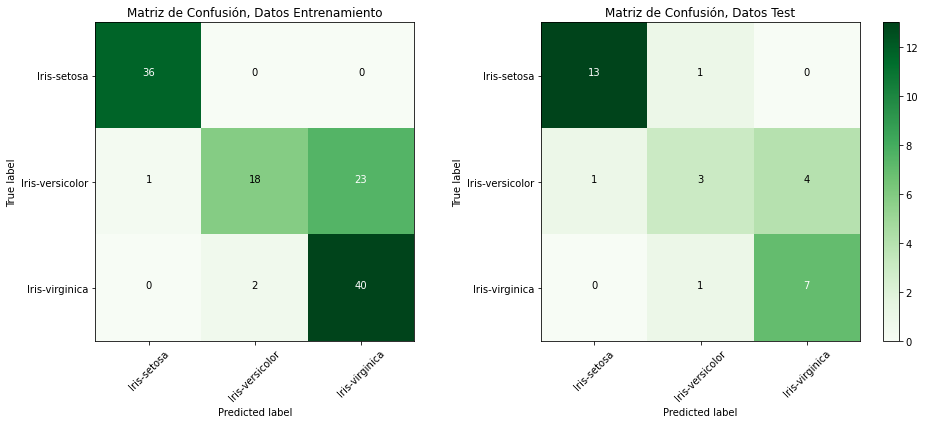

In [11]:
# Cálculo de las matrices de confusión
confusion_train = confusion_matrix(y_true=y_train,y_pred=logreg.predict(X_train))
confusion_test = confusion_matrix(y_true=y_test,y_pred=logreg.predict(X_test))

# Pintado de las matrices de confusión
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plot_confusion_matrix(confusion_train, classes=le.classes_, title='Matriz de Confusión, Datos Entrenamiento')
plt.subplot(1, 2, 2)
plot_confusion_matrix(confusion_test, classes=le.classes_, title='Matriz de Confusión, Datos Test')
plt.show()

<hr>


## 7. Visualización de los resultados


* Vamos a continuación a dibujar como clasifica el modelo en un espacio de dos para los datos de entrenamiento y test:


* En primer lugar definimos la malla:

In [12]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predicción de cada uno de los puntos de la malla
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

* Dibujamos las regiones y como clasificariamos los datos de entrenamiento y test:

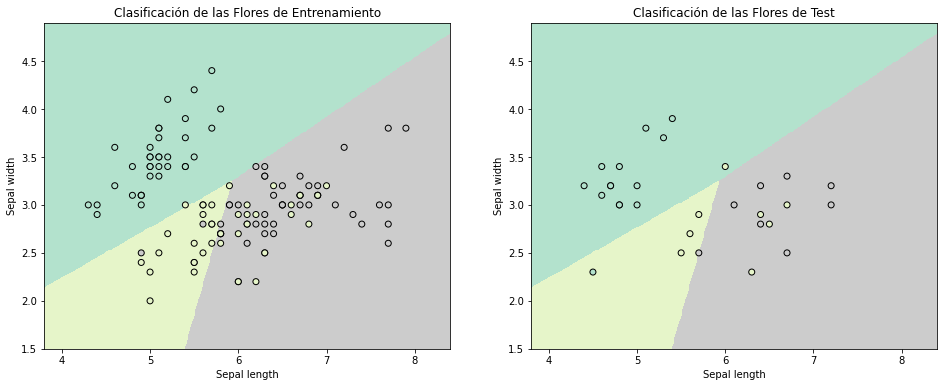

In [13]:
plt.figure(figsize=(16, 6))

# Datos de entrenamiento
plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Pastel2)
plt.title('Clasificación de las Flores de Entrenamiento')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# Datos de Test
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Pastel2)
plt.title('Clasificación de las Flores de Test')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

<hr>

*Este Notebook ha sido desarrollado por **Ricardo Moya García** y registrado en Safe Creative como ***Atribución-NoComercial-CompartirIgual***.*

<img src="./imgs/CC_BY-NC-SA.png" alt="CC BY-NC">